In [1]:
from pylab import *
from retraites import *

scenarios_labels=["Hausse des salaires: +1,8%/an, Taux de chômage: 7%",
                  "Hausse des salaires: +1,5%/an, Taux de chômage: 7%",
                  "Hausse des salaires: +1,3%/an, Taux de chômage: 7%",
                  "Hausse des salaires: +1%/an, Taux de chômage: 7%",
                  "Hausse des salaires: +1,8%/an, Taux de chômage: 4.5%",
                  "Hausse des salaires: +1%/an, Taux de chômage: 10%"]

In [2]:
### fonctions pour générer des graphiques


dir_image="./fig/"        # répertoire pour les images
ext_image=["png","pdf"]   # types de fichier à générer

def mysavefig(f):
    for ext in ext_image:
        savefig(dir_image + f + "." + ext)

def graphique(v, nom, fs=8, rg=[], leg=False, sc=scenarios):

    if nom=="EV":
        an=annees_EV
    else:
        an=annees

    for s in sc:
        plot(an, [ v[s][a] for a in an ], label=scenarios_labels[s-1].decode("utf-8") )

    # titres des figures
    
    t=["Situation financière du système (part du PIB)",
       "Niveau de vie des retraités p/r à celui des actifs",
       "Proportion de la vie passée à la retraite",
       "Taux de cotisation de retraite (part du PIB)",
       "Age de départ effectif moyen à la retraite",
       "Ratio (pension moyenne)/(salaire moyen)",
       "B: Part des revenus d'activité bruts dans le PIB",
       "NR: Nombre de retraités",
       "NC: Nombre de cotisants",
       "G: Effectif d'une generation arrivant à l'âge de la retraite",
       "dP: Autres dépenses de retraites",
       "TPR: Taux de prélèvement sur les retraites",
       "TPS: Taux de prélèvement sur les salaires",
       "CNV: (niveau de vie)/[(pension moy))/(salaire moy)]",
       "EV: Espérance de vie à 60 ans"
    ][ ["S","RNV","REV","T","A","P","B","NR","NC","G","dP","TPR","TPS","CNV","EV"].index(nom) ]
       
    title(t.decode("utf-8"),fontsize=fs)
    if rg!=[]:
        ylim(bottom=rg[0],top=rg[1])
    if leg:
        legend(loc="best")

def graphiques(T, P, A, S, RNV, REV, fs=8):

    for i in xrange(6):
        subplot(3,2,i+1)
        v,V,r = [ (S,"S" ,[-0.02,0.02]),
                  (RNV,"RNV", [0.6,1.2]),
                  (REV,"REV", [0.2,0.4]),
                  (T,"T", [0.25,0.4] ),
                  (A,"A", [60,70]),
                  (P,"P", [.25,.55]) ][ i ]
        graphique(v, V, fs ,r)
    tight_layout(rect=[0, 0.03, 1, 0.95])

    
##############################################################################

def affiche_solutions_simulateur_COR(Ts,Ps,As):

    print "Valeur à rentrer sur le simulateur officiel du COR:"
    
    ans=[2020, 2025, 2030, 2040, 2050, 2060, 2070]
    for s in scenarios:
        print
        print "Scenario",s,": ",scenarios_labels[s-1] 
        print "Age:        ",
        for a in ans:
            print "%.1f"%(As[s][a]),
        print
        print "Cotisation: ",
        for a in ans:
            print "%.1f"%(100*Ts[s][a]),
        print
        print "Pension:    ",
        for a in ans:
            print "%.1f"%(100*Ps[s][a]),
        print

    print


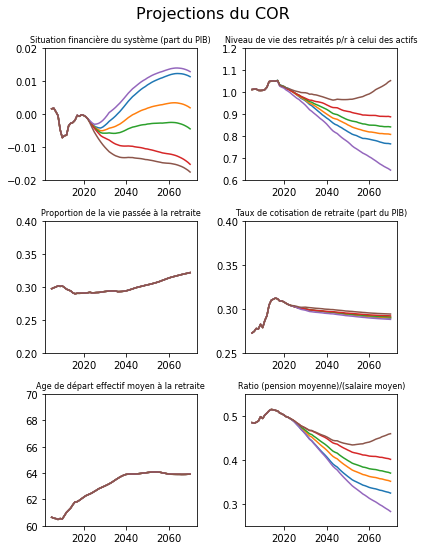

In [3]:
##############################################################################
# SIMULATION NUMERIQUES
    
# génération des graphes pour le statu quo (COR)

def simu0():

    figure(figsize=(6,8))
    suptitle('Projections du COR',fontsize=16)
    
    T,P,A = get('T'), get('P'), get('A')
    S,RNV,REV = calcule_S_RNV_REV(T,P,A)

    graphiques(T,P,A, S,RNV,REV)

    mysavefig("cor")

simu0()

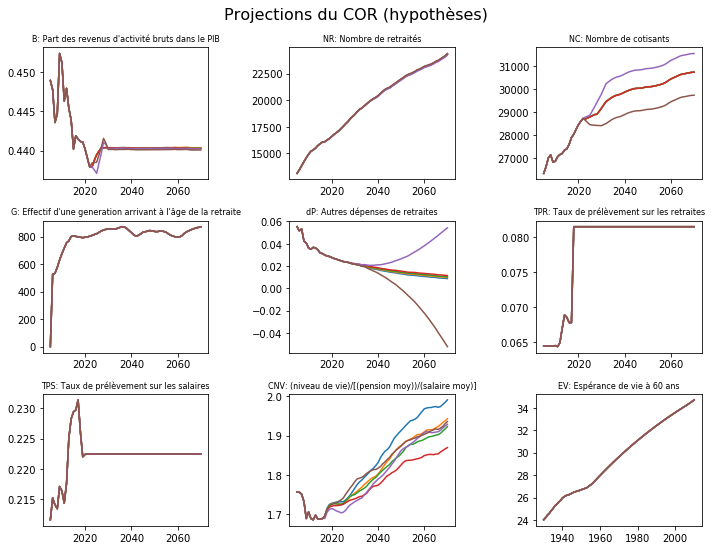

In [4]:
# génération des graphes sur la conjoncture

def simu1():

    B,NR,NC,G,dP,TPR,TPS,CNV,EV=get('B'),get('NR'),get('NC'),get('G'),get('dP'),get('TCR'),get('TCS'),get('CNV'),get('EV')
    
    figure(figsize=(10,8))
    suptitle("Projections du COR (hypothèses)".decode("utf-8"),fontsize=16)
    for c in xrange(9):
        subplot(3,3,c+1)
        v,V = [ (B,'B'), (NR,'NR'), (NC,'NC'), (G,'G'), (dP,'dP'), (TPR,'TPR'), (TPS,'TPS'), (CNV,'CNV'), (EV,'EV') ][c]
        graphique(v,V)
    tight_layout(rect=[0, 0.03, 1, 0.95])
    
    mysavefig("conjoncture")
simu1()

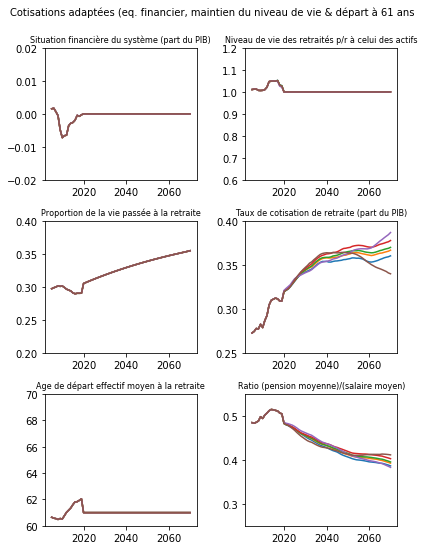

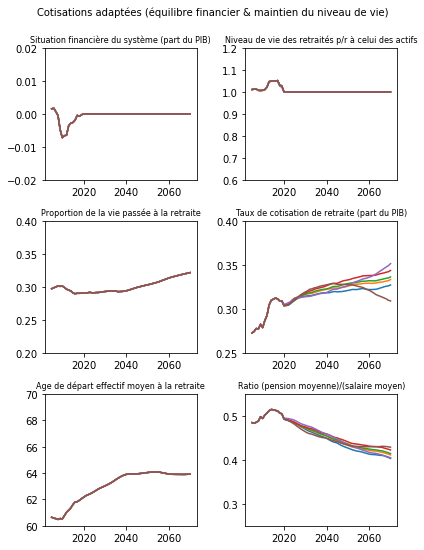

In [5]:
# génération des graphes pour des réformes à prestation garantie

def simu2(ages=[61,0]):
    
    for d in ages:

        figure(figsize=(6,8))
        if d!=0:
            suptitle( ("Cotisations adaptées (eq. financier, maintien du niveau de vie & départ à %d ans"%(d)).decode("utf-8"),fontsize=10)
        else:
            suptitle("Cotisations adaptées (équilibre financier & maintien du niveau de vie)".decode("utf-8"),fontsize=10)
                
        Ts,Ps,As = calcule_Ts_Ps_As_fixant_As_RNV_S(d)
        S,RNV,REV = calcule_S_RNV_REV(Ts,Ps,As)
        
        graphiques(Ts,Ps,As, S,RNV,REV)
        
        if d!=0:
            mysavefig( ("%dans"%(d)))
        else:
            mysavefig("cotisations")
simu2()

Maintien du niveau de vie
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:         61.8 63.1 64.1 65.7 66.3 66.8 67.2
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.1 28.9
Pension:     49.0 48.9 47.9 46.2 44.3 43.0 42.5

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:         61.9 63.2 64.2 65.9 66.7 67.4 67.7
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.1 29.0
Pension:     49.0 49.0 48.3 47.0 45.2 44.3 43.6

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:         61.9 63.2 64.2 66.0 66.9 67.6 67.8
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.2 29.1
Pension:     49.0 49.0 48.4 47.0 45.7 44.8 44.0

Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:         61.9 63.2 64.4 66.2 67.2 67.9 68.3
Cotisation:  30.8 30.2 30.0 29.7 29.5 29.3 29.2
Pension:     49.2 49.1 48.7 47.7 46.4 45.8 45.3

Scenario 5 :  Hausse des salaires: +1,8%/an, Taux de chômage: 4.5%
Age:         62.

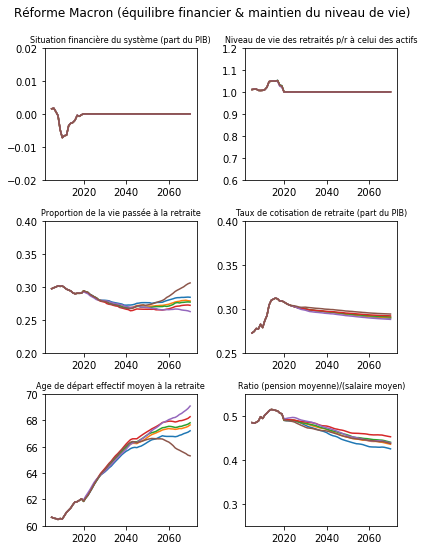

In [6]:
# génération des graphes pour la réforme Macron avec maintien du niveau de vie

def simu3(Ts=0):
    
    figure(figsize=(6,8))
    suptitle('Réforme Macron (équilibre financier & maintien du niveau de vie)'.decode("utf-8"),fontsize=12)
                
    Ts,Ps,As = calcule_Ts_Ps_As_fixant_Ts_RNV_S(Ts)
    S,RNV,REV = calcule_S_RNV_REV(Ts,Ps,As)
        
    graphiques(Ts,Ps,As, S,RNV,REV)
    
    print "Maintien du niveau de vie"
    affiche_solutions_simulateur_COR(Ts,Ps,As)
    
    #mysavefig("macron_niveau_de_vie")
simu3()

Maintien du rapport pension moyenne / salaire moyen
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:         62.2 63.5 64.8 67.0 68.5 69.6 70.1
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.1 28.9
Pension:     50.2 50.2 50.2 50.2 50.2 50.2 50.2

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:         62.2 63.5 64.8 67.0 68.5 69.7 70.1
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.1 29.0
Pension:     50.2 50.2 50.2 50.2 50.2 50.2 50.2

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:         62.2 63.5 64.8 67.0 68.5 69.6 70.1
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.2 29.1
Pension:     50.2 50.2 50.2 50.2 50.2 50.2 50.2

Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:         62.2 63.5 64.8 67.0 68.5 69.6 70.0
Cotisation:  30.8 30.2 30.0 29.7 29.5 29.3 29.2
Pension:     50.2 50.2 50.2 50.2 50.2 50.2 50.2

Scenario 5 :  Hausse des salaires: +1,8%/an, Taux de chôm

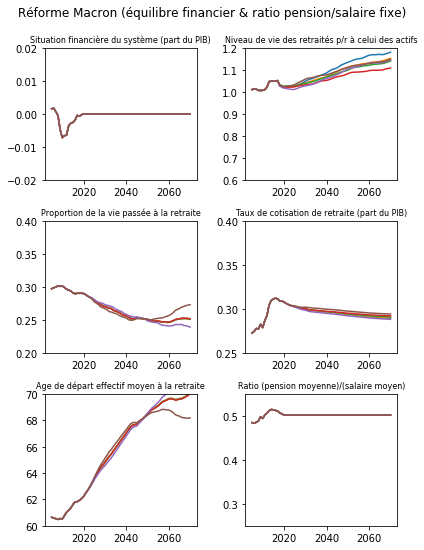

In [7]:
# génération des graphes pour la réforme Macron avec point indexé sur le salaire moyen (rapport (pension moyenne/)(salaire moyen) constant égal à celui de 2020)

def simu4(Ps=0,Ts=0):

    figure(figsize=(6,8))
    suptitle('Réforme Macron (équilibre financier & ratio pension/salaire fixe)'.decode("utf-8"),fontsize=12)
                
    Ts,Ps,As = calcule_Ts_Ps_As_fixant_Ps_Ts_S(Ps,Ts)
    S,RNV,REV = calcule_S_RNV_REV(Ts,Ps,As)
        
    graphiques(Ts,Ps,As, S,RNV,REV)
    mysavefig("macron_point_indexe")
    
    print "Maintien du rapport pension moyenne / salaire moyen"
    affiche_solutions_simulateur_COR(Ts,Ps,As)
simu4()

Données et figure pour article 2
Maintien du niveau de vie
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:         61.8 63.1 64.1 65.7 66.3 66.8 67.2
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.1 28.9
Pension:     49.0 48.9 47.9 46.2 44.3 43.0 42.5

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:         61.9 63.2 64.2 65.9 66.7 67.4 67.7
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.1 29.0
Pension:     49.0 49.0 48.3 47.0 45.2 44.3 43.6

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:         61.9 63.2 64.2 66.0 66.9 67.6 67.8
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.2 29.1
Pension:     49.0 49.0 48.4 47.0 45.7 44.8 44.0

Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:         61.9 63.2 64.4 66.2 67.2 67.9 68.3
Cotisation:  30.8 30.2 30.0 29.7 29.5 29.3 29.2
Pension:     49.2 49.1 48.7 47.7 46.4 45.8 45.3

Scenario 5 :  Hausse des salaires: +1,8%/an, Taux 

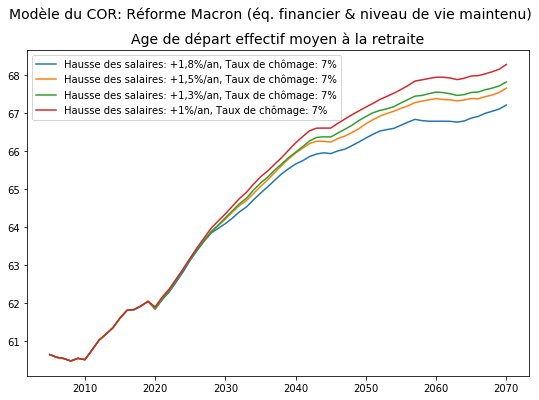

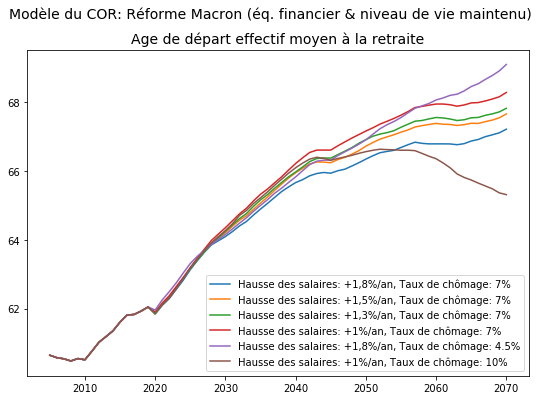

In [8]:
############################################################################
# génération des figures pour les articles mediapart

def pour_article_2():

    print "Données et figure pour article 2"
    
    Ts,Ps,As = calcule_Ts_Ps_As_fixant_Ts_RNV_S(0)
    S,RNV,REV = calcule_S_RNV_REV(Ts,Ps,As)
        
    figure(figsize=(9,6))
    graphique(As,"A",14,[],True,range(1,5))
    suptitle("Modèle du COR: Réforme Macron (éq. financier & niveau de vie maintenu)".decode("utf-8"),fontsize=14)
    legend(loc="best")
    mysavefig("macron_68_ans")

    figure(figsize=(9,6))
    graphique(As,"A",14,[],True)
    suptitle("Modèle du COR: Réforme Macron (éq. financier & niveau de vie maintenu)".decode("utf-8"),fontsize=14)
    legend(loc="best")
    mysavefig("macron_68_ans_tout")
    
    print "Maintien du niveau de vie"
    affiche_solutions_simulateur_COR(Ts,Ps,As)

pour_article_2()

Données et figures pour article 3
Départ à 62 ans
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:         62.0 62.0 62.0 62.0 62.0 62.0 62.0
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.1 28.9
Pension:     49.5 45.5 41.9 37.6 35.0 34.0 32.4

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:         62.0 62.0 62.0 62.0 62.0 62.0 62.0
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.1 29.0
Pension:     49.5 45.5 41.9 37.5 34.9 33.9 32.4

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:         62.0 62.0 62.0 62.0 62.0 62.0 62.0
Cotisation:  30.8 30.2 30.0 29.7 29.4 29.2 29.1
Pension:     49.5 45.4 41.9 37.5 34.9 33.9 32.4

Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:         62.0 62.0 62.0 62.0 62.0 62.0 62.0
Cotisation:  30.8 30.2 30.0 29.7 29.5 29.3 29.2
Pension:     49.5 45.4 41.9 37.5 34.9 33.9 32.4

Scenario 5 :  Hausse des salaires: +1,8%/an, Taux de chômag

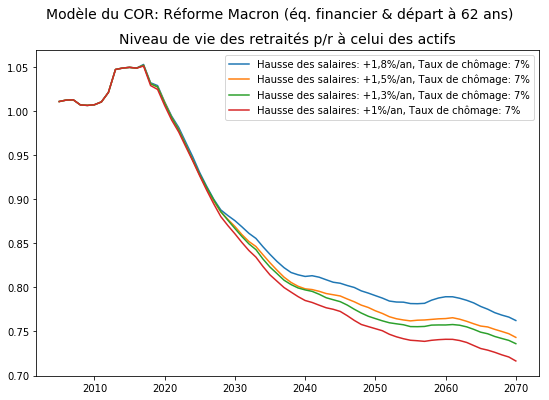

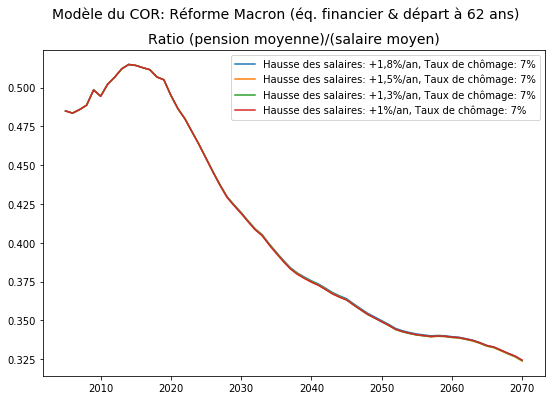

In [9]:
def pour_article_3():

    print "Données et figures pour article 3"
    
    Ts,Ps,As = calcule_Ts_Ps_As_fixant_As_Ts_S(62) 
    S,RNV,REV = calcule_S_RNV_REV(Ts,Ps,As)

    titre="Modèle du COR: Réforme Macron (éq. financier & départ à 62 ans)".decode("utf-8")
    
    figure(figsize=(9,6))
    graphique(RNV,"RNV",14,[],True,range(1,5))
    suptitle(titre,fontsize=14)
    legend(loc="best")
    mysavefig("macron_62_ans_nv")
    
    figure(figsize=(9,6))
    graphique(Ps,"P",14,[],True,range(1,5))
    suptitle(titre,fontsize=14)
    legend(loc="best")
    mysavefig("macron_62_ans_p")
    
    print "Départ à 62 ans"
    affiche_solutions_simulateur_COR(Ts,Ps,As)

pour_article_3()